# Read Data

In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf

# Volatility

In [2]:
start = datetime(2018, 1, 1)
end = datetime(2023, 1, 1)

#ticker = web.DataReader('^IXIC', 'yahoo', start=start, end=end)
ticker = yf.Ticker('^IXIC').history(interval='1d', start=start, end=end)

returns = 100 * ticker.Close.pct_change().dropna()

Text(0.5, 1.0, 'Returns')

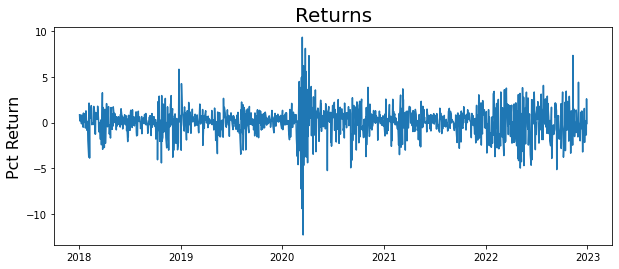

In [3]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Returns', fontsize=20)

# ACF

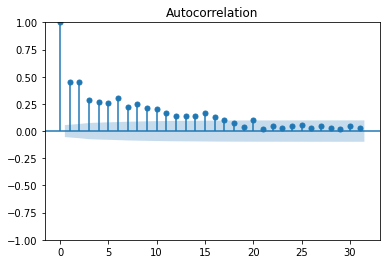

In [4]:
plot_acf(returns**2)
plt.show()

# PACF

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


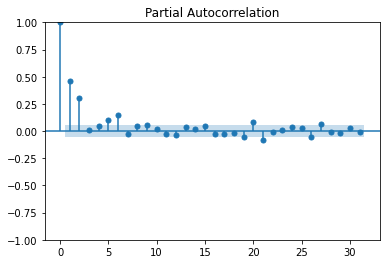

In [5]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,6)

In [6]:
model = arch_model(returns, p=2, q=6)

model_fit = model.fit()

model_fit.summary()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 6663.2516877608305
Iteration:      2,   Func. Count:     27,   Neg. LLF: 17449721786.144733
Iteration:      3,   Func. Count:     40,   Neg. LLF: 2836.3875139490865
Iteration:      4,   Func. Count:     52,   Neg. LLF: 2290.5262295387984
Iteration:      5,   Func. Count:     64,   Neg. LLF: 2357.2347803335288
Iteration:      6,   Func. Count:     77,   Neg. LLF: 2145.5551871289235
Iteration:      7,   Func. Count:     88,   Neg. LLF: 2249.4761027887366
Iteration:      8,   Func. Count:    100,   Neg. LLF: 2179.3026830453045
Iteration:      9,   Func. Count:    113,   Neg. LLF: 2795.4293971226534
Iteration:     10,   Func. Count:    125,   Neg. LLF: 2217.21062909093
Iteration:     11,   Func. Count:    137,   Neg. LLF: 2138.1300540138145
Iteration:     12,   Func. Count:    149,   Neg. LLF: 2137.610138577913
Iteration:     13,   Func. Count:    161,   Neg. LLF: 2137.442146815193
Iteration:     14,   Func. Count:    173,   Neg. LLF: 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2137.36
Distribution:                  Normal   AIC:                           4294.72
Method:            Maximum Likelihood   BIC:                           4346.09
                                        No. Observations:                 1258
Date:                Tue, May 02 2023   Df Residuals:                     1257
Time:                        00:44:27   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1041  3.632e-02      2.867  4.143e-03 [3.294e-02,  0.175]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1026  3.895e-02      2.635  8.414e-03 [2.629e-02,  0.179]
alpha[1]       0.1325      0.148      0.896      0.370   [ -0.157,  0.422]
alpha[2]       0.2137  5.745e-02      3.720  1.989e-04   [  0.101,  0.326]
beta[1]        0.0219      0.962  2.273e-02      0.982   [ -1.863,  1.907]
beta[2]        0.5891      1.079      0.546      0.585   [ -1.525,  2.703]
beta[3]    4.8682e-14      1.018  4.782e-14      1.000   [ -1.995,  1.995]
beta[4]        0.0000      1.673      0.000      1.000   [ -3.279,  3.279]
beta[5]        0.0264      0.410  6.440e-02      0.949   [ -0.778,  0.831]
beta[6]        0.0000      0.847      0.000      1.000   [ -1.661,  1.661]
==========================================================================

Covariance estimator: robust
"""

# Try GARCH(2,2)

In [7]:
model = arch_model(returns, p=2, q=2)

model_fit = model.fit()

model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 7029.6476079875065
Iteration:      2,   Func. Count:     20,   Neg. LLF: 11024099445.648754
Iteration:      3,   Func. Count:     30,   Neg. LLF: 2481.8519027921643
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2166.7719881419753
Iteration:      5,   Func. Count:     46,   Neg. LLF: 2145.6921172128386
Iteration:      6,   Func. Count:     54,   Neg. LLF: 2176.6253690394014
Iteration:      7,   Func. Count:     62,   Neg. LLF: 2296.5245233087803
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2139.955371392033
Iteration:      9,   Func. Count:     79,   Neg. LLF: 2138.821406479639
Iteration:     10,   Func. Count:     87,   Neg. LLF: 2138.125871399136
Iteration:     11,   Func. Count:     95,   Neg. LLF: 2137.6896569963856
Iteration:     12,   Func. Count:    103,   Neg. LLF: 2137.540839773503
Iteration:     13,   Func. Count:    111,   Neg. LLF: 2137.4285009394125
Iteration:     14,   Func. Count:    118,   Neg. LLF: 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2137.42
Distribution:                  Normal   AIC:                           4286.84
Method:            Maximum Likelihood   BIC:                           4317.67
                                        No. Observations:                 1258
Date:                Tue, May 02 2023   Df Residuals:                     1257
Time:                        00:44:27   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1045  3.455e-02      3.026  2.479e-03 [3.682e-02,  0.172]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1014  3.010e-02      3.368  7.565e-04  [4.239e-02,  0.160]
alpha[1]       0.1275  4.536e-02      2.810  4.949e-03  [3.857e-02,  0.216]
alpha[2]       0.2066  4.722e-02      4.376  1.209e-05    [  0.114,  0.299]
beta[1]        0.0584  7.336e-02      0.796      0.426 [-8.538e-02,  0.202]
beta[2]        0.5906  6.779e-02      8.712  2.983e-18    [  0.458,  0.724]
===========================================================================

Covariance estimator: robust
"""

In [8]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

In [9]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

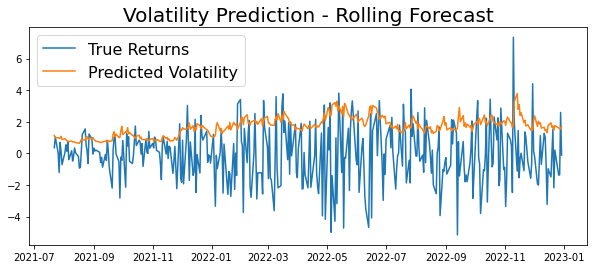

In [10]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [11]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [12]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

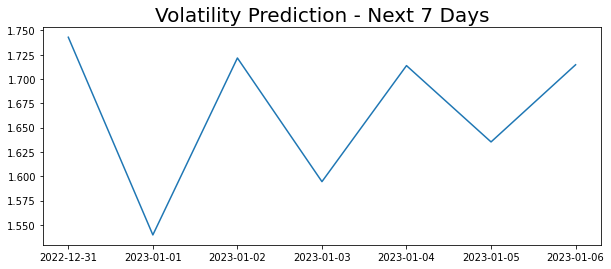

In [13]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)